# **Taller 1 - Demanda de ocupación hotelera**

### **Integrantes:**
- María Alejandra Pérez Petro - 201923972
- Daniel Esteban Aguilera Figueroa - 202010592 

### 1. **Entendimiento de los datos**

A continuación se cargan los datos presentados en el archivo `hotel_bookings_modified.csv` y se muestran las primeras filas para entender la estructura de los datos.

Se importan las librerías necesarias para el análisis de los datos.

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

Se cargan los datos

In [43]:
hotel_df: pd.DataFrame = pd.read_csv("./data/hotel_bookings_modified.csv")

C:\Users\dania\AppData\Local\Temp\ipykernel_25372\2746181375.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  hotel_df: pd.DataFrame = pd.read_csv("./data/hotel_bookings_modified.csv")


In [44]:
hotel_df.shape

(58895, 33)

Se revisan las dimensiones del dataset. Este cuenta con 33 columnas y 58895 filas

In [45]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Se listan los atributos del dataset y sus tipos, es importante mencionar un problema que existe con la columna Company, cuenta con un mixed type que es necesario arreglar más adelante 

In [46]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,NaN


De igual manera, se hace un profilling general para una mejor revisión de todas las variables

In [47]:
profile = ProfileReport(hotel_df)

In [48]:
# profile.to_file('report.html')

### **Top 5 atributos más importantes para el análisis**

Basándome en el contexto del negocio hotelero y los objetivos de análisis (optimización de ocupación, gestión de cancelaciones, políticas de precios), he seleccionado los siguientes 5 atributos como los más importantes:

#### **1. is_canceled** 
Variable objetivo principal para entender patrones de cancelación

#### **2. adr (Average Daily Rate)**
Indicador clave de ingresos y estrategia de precios

#### **3. lead_time**
Tiempo de anticipación de la reserva - crucial para planificación y gestión de demanda

#### **4. hotel**
Tipo de hotel (Resort vs City) - segmentación fundamental del negocio

#### **5. customer_type**
Tipo de cliente - esencial para entender diferentes segmentos y sus comportamientos


#### **1. Análisis de is_canceled (Variable de cancelación)**

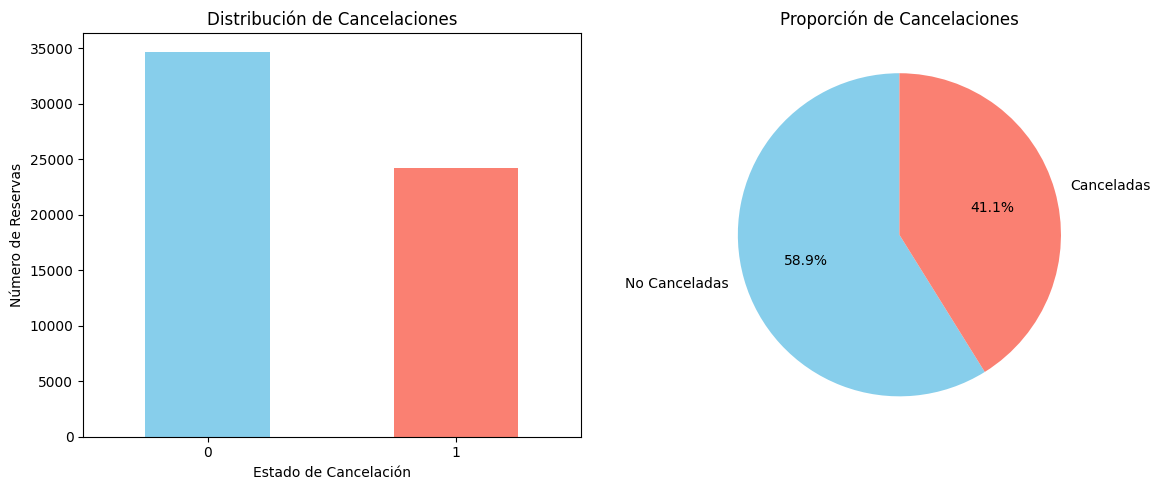

In [49]:
# Distribución de cancelaciones
cancelation_stats = hotel_df['is_canceled'].value_counts()
cancelation_pct = hotel_df['is_canceled'].value_counts(normalize=True) * 100

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
cancelation_stats.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribución de Cancelaciones')
ax1.set_xlabel('Estado de Cancelación')
ax1.set_ylabel('Número de Reservas')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pastel
ax2.pie(cancelation_stats.values, labels=['No Canceladas', 'Canceladas'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
ax2.set_title('Proporción de Cancelaciones')

plt.tight_layout()
plt.show()


#### **2. Análisis de adr (Average Daily Rate)**

Estadísticas descriptivas:
Media: $96.25
Mediana: $84.00
Desviación estándar: $58.56
Mínimo: $-6.38
Máximo: $5400.00
Q1 (25%): $60.00
Q3 (75%): $120.00


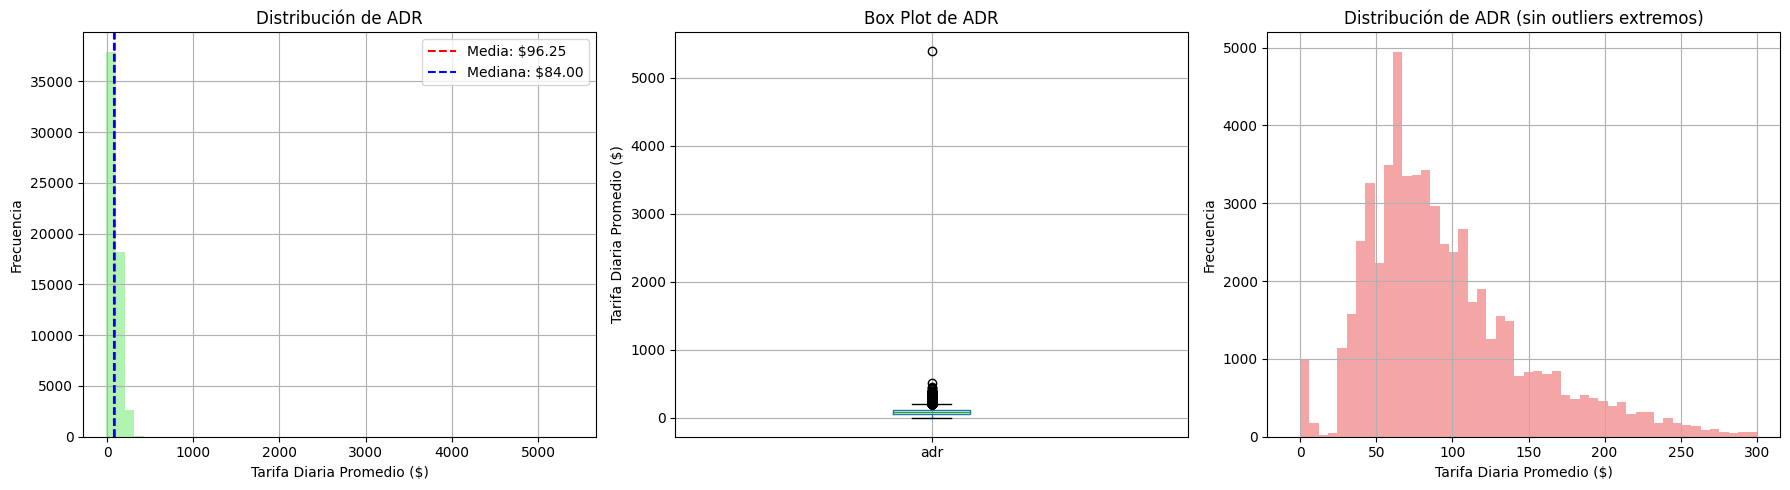

In [50]:
# Estadísticas descriptivas
adr_stats = hotel_df['adr'].describe()
print("Estadísticas descriptivas:")
print(f"Media: ${adr_stats['mean']:.2f}")
print(f"Mediana: ${adr_stats['50%']:.2f}")
print(f"Desviación estándar: ${adr_stats['std']:.2f}")
print(f"Mínimo: ${adr_stats['min']:.2f}")
print(f"Máximo: ${adr_stats['max']:.2f}")
print(f"Q1 (25%): ${adr_stats['25%']:.2f}")
print(f"Q3 (75%): ${adr_stats['75%']:.2f}")

# Visualización
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
hotel_df['adr'].hist(bins=50, ax=ax1, color='lightgreen', alpha=0.7)
ax1.set_title('Distribución de ADR')
ax1.set_xlabel('Tarifa Diaria Promedio ($)')
ax1.set_ylabel('Frecuencia')
ax1.axvline(adr_stats['mean'], color='red', linestyle='--', label=f'Media: ${adr_stats["mean"]:.2f}')
ax1.axvline(adr_stats['50%'], color='blue', linestyle='--', label=f'Mediana: ${adr_stats["50%"]:.2f}')
ax1.legend()

# Box plot
hotel_df.boxplot(column='adr', ax=ax2)
ax2.set_title('Box Plot de ADR')
ax2.set_ylabel('Tarifa Diaria Promedio ($)')

# Histograma sin outliers extremos (para mejor visualización)
Q1 = adr_stats['25%']
Q3 = adr_stats['75%']
adr_filtered = hotel_df[hotel_df['adr'] <= adr_stats['75%'] + 3 * (Q3 - Q1)]['adr']
adr_filtered.hist(bins=50, ax=ax3, color='lightcoral', alpha=0.7)
ax3.set_title('Distribución de ADR (sin outliers extremos)')
ax3.set_xlabel('Tarifa Diaria Promedio ($)')
ax3.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#### **3. Análisis de lead_time (Tiempo de anticipación)**

In [51]:
# Categorización del lead time
def categorize_lead_time(days):
    if days == 0:
        return 'Mismo día'
    elif days <= 7:
        return '1 semana'
    elif days <= 30:
        return '1 mes'
    elif days <= 90:
        return '3 meses'
    elif days <= 180:
        return '6 meses'
    else:
        return 'Más de 6 meses'

Estadísticas descriptivas:
Media: 100.05 días
Mediana: 69.00 días
Desviación estándar: 101.16 días
Mínimo: 0 días
Máximo: 737 días
Q1 (25%): 17.00 días
Q3 (75%): 157.00 días


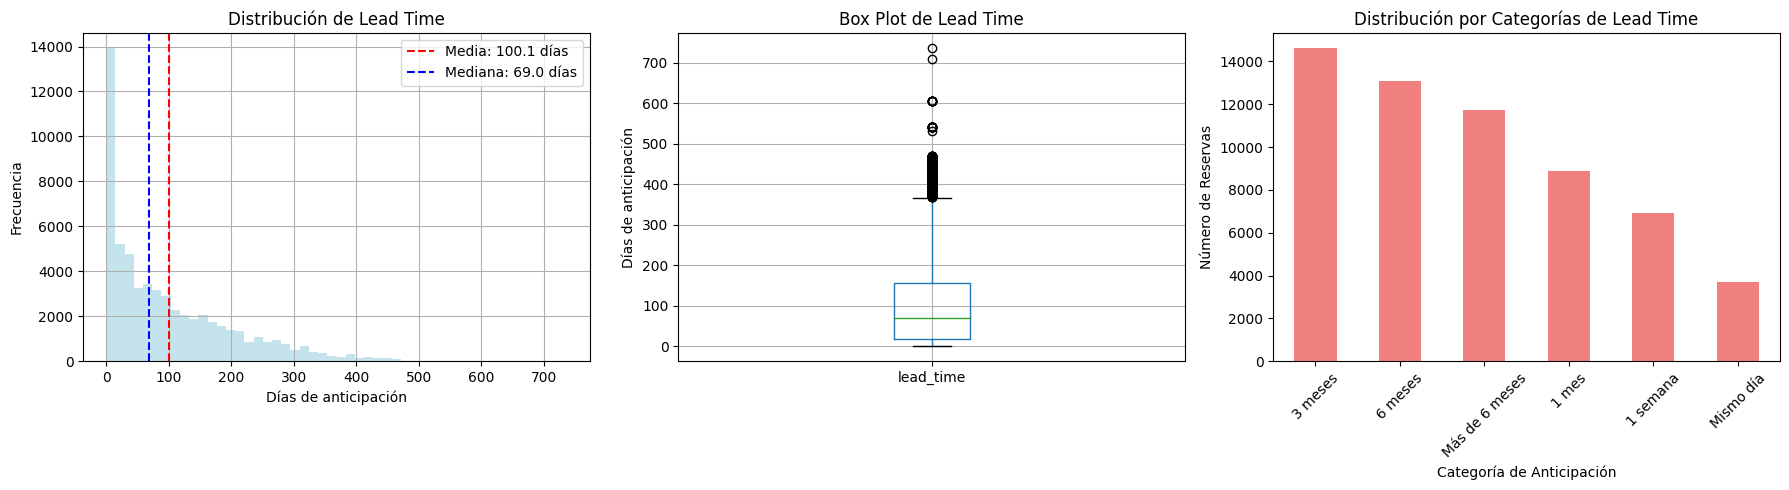

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,...,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,...,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,...,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,...,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58890,Resort Hotel,0,3,2016.0,April,16,11,1,0,1,...,240.0,NaN,0.0,Transient-Party,56.00,0.0,1.0,Check-Out,2016-04-12,NaN
58891,Resort Hotel,1,158,2016.0,May,20,8,2,2,2,...,250.0,NaN,0.0,Transient,83.05,0.0,1.0,Canceled,2016-01-21,NaN
58892,City Hotel,1,18,2016.0,August,32,6,2,2,2,...,9.0,NaN,0.0,Transient,151.00,0.0,2.0,Canceled,2016-07-28,NaN
58893,Resort Hotel,1,383,2016.0,October,41,6,1,3,2,...,315.0,NaN,0.0,Transient-Party,48.00,0.0,0.0,Canceled,2016-03-04,NaN


In [52]:
# Estadísticas descriptivas
lead_time_stats = hotel_df['lead_time'].describe()
print("Estadísticas descriptivas:")
print(f"Media: {lead_time_stats['mean']:.2f} días")
print(f"Mediana: {lead_time_stats['50%']:.2f} días")
print(f"Desviación estándar: {lead_time_stats['std']:.2f} días")
print(f"Mínimo: {lead_time_stats['min']:.0f} días")
print(f"Máximo: {lead_time_stats['max']:.0f} días")
print(f"Q1 (25%): {lead_time_stats['25%']:.2f} días")
print(f"Q3 (75%): {lead_time_stats['75%']:.2f} días")

hotel_df['lead_time_category'] = hotel_df['lead_time'].apply(categorize_lead_time)
lead_time_categories = hotel_df['lead_time_category'].value_counts()

# Visualización
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Histograma
hotel_df['lead_time'].hist(bins=50, ax=ax1, color='lightblue', alpha=0.7)
ax1.set_title('Distribución de Lead Time')
ax1.set_xlabel('Días de anticipación')
ax1.set_ylabel('Frecuencia')
ax1.axvline(lead_time_stats['mean'], color='red', linestyle='--', label=f'Media: {lead_time_stats["mean"]:.1f} días')
ax1.axvline(lead_time_stats['50%'], color='blue', linestyle='--', label=f'Mediana: {lead_time_stats["50%"]:.1f} días')
ax1.legend()

# Box plot
hotel_df.boxplot(column='lead_time', ax=ax2)
ax2.set_title('Box Plot de Lead Time')
ax2.set_ylabel('Días de anticipación')

# Gráfico de barras por categorías
lead_time_categories.plot(kind='bar', ax=ax3, color='lightcoral')
ax3.set_title('Distribución por Categorías de Lead Time')
ax3.set_xlabel('Categoría de Anticipación')
ax3.set_ylabel('Número de Reservas')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Limpiar columna temporal
hotel_df.drop('lead_time_category', axis=1)

#### **4. Análisis de hotel (Tipo de hotel)**

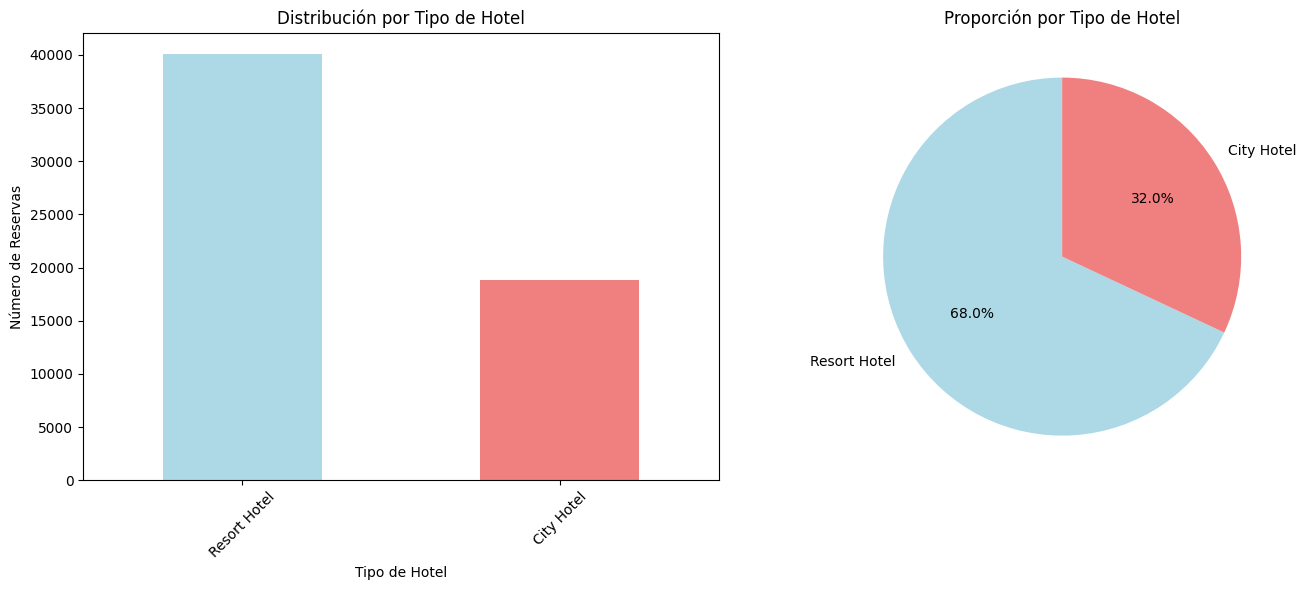

In [53]:
# Distribución por tipo de hotel
hotel_stats = hotel_df['hotel'].value_counts()
hotel_pct = hotel_df['hotel'].value_counts(normalize=True) * 100

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
hotel_stats.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Distribución por Tipo de Hotel')
ax1.set_xlabel('Tipo de Hotel')
ax1.set_ylabel('Número de Reservas')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pastel
ax2.pie(hotel_stats.values, labels=hotel_stats.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Proporción por Tipo de Hotel')

plt.tight_layout()
plt.show()


#### **5. Análisis de customer_type (Tipo de cliente)**

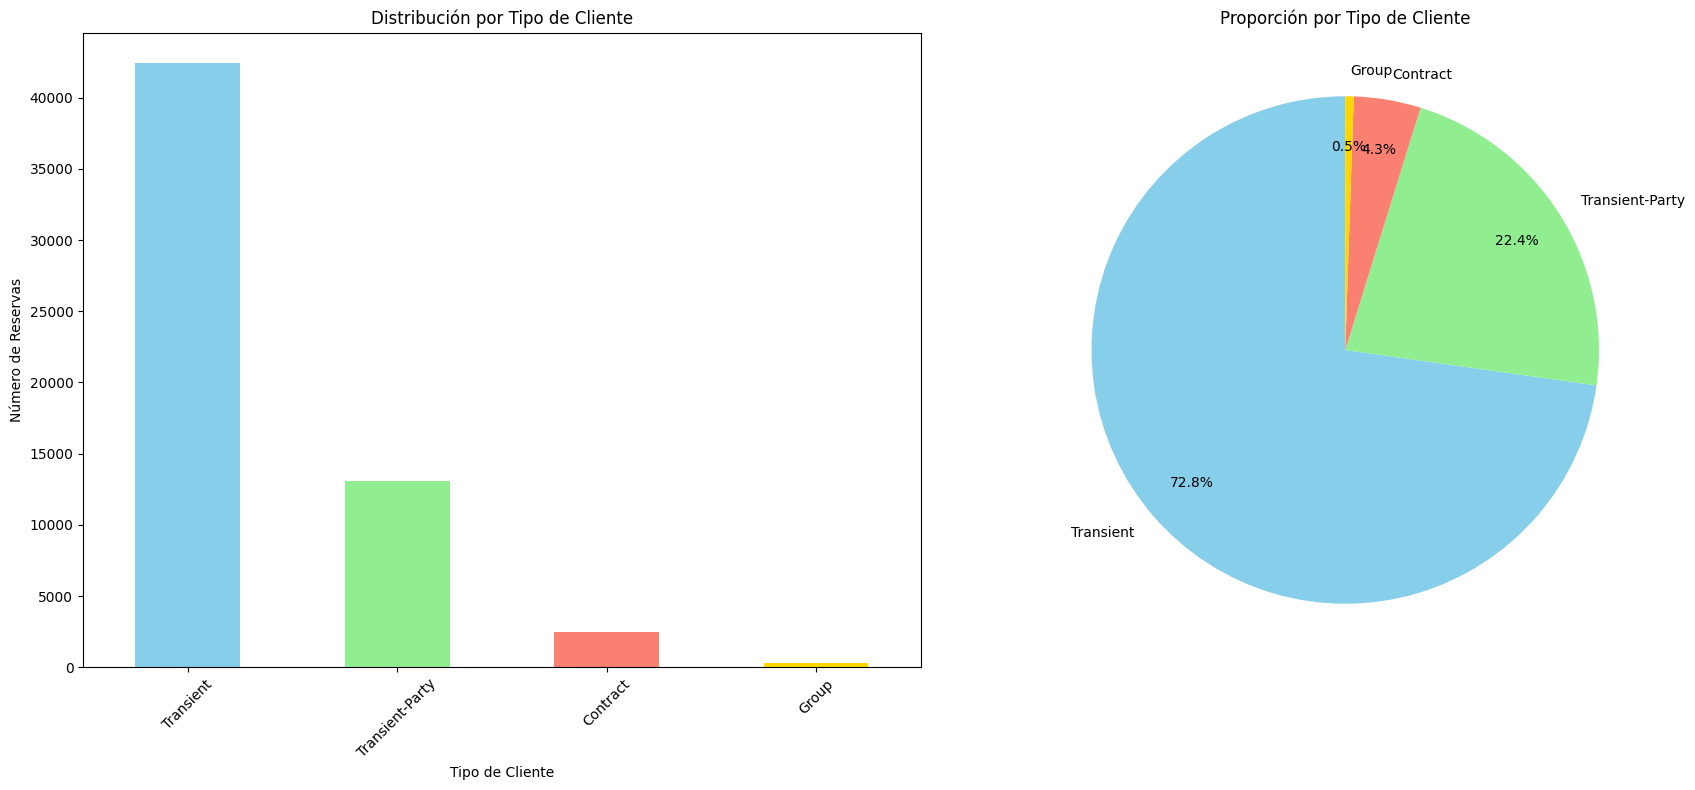

In [54]:
# Distribución por tipo de cliente
customer_stats = hotel_df['customer_type'].value_counts()
customer_pct = hotel_df['customer_type'].value_counts(normalize=True) * 100

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras
customer_stats.plot(kind='bar', ax=ax1, color=['skyblue', 'lightgreen', 'salmon', 'gold'])
ax1.set_title('Distribución por Tipo de Cliente')
ax1.set_xlabel('Tipo de Cliente')
ax1.set_ylabel('Número de Reservas')
ax1.tick_params(axis='x', rotation=45)

# Pie Chart
ax2.pie(
    customer_stats.values, 
    labels=customer_stats.index, 
    autopct='%1.1f%%',
    startangle=90, 
    colors=['skyblue', 'lightgreen', 'salmon', 'gold'],
    pctdistance=0.8,
    labeldistance=1.1
)
ax2.set_title('Proporción por Tipo de Cliente')

plt.tight_layout()
plt.show()


### 2. **Estrategia de análisis**

La estrategia de análisis consistirá en estudiar la relación entre la variable objetivo is_canceled y los principales factores asociados al comportamiento de las reservas (adr, lead_time, hotel y customer_type). En una primera etapa se calcularán estadísticos descriptivos (medias, medianas, distribuciones y tasas de cancelación) y se aplicarán análisis univariados y multivariados que permitan identificar, por ejemplo: cómo varía la tarifa diaria promedio según el tipo de hotel, o cómo el tiempo de anticipación afecta la probabilidad de cancelación.

Posteriormente, se emplearán técnicas de visualización multivariada como histogramas comparativos, boxplots y gráficos de barras segmentados para estudiar combinaciones de variables (ejemplo: tasa de cancelación por tipo de cliente y rango de lead_time). Además, se trabajarán mapas de calor para encontrar las variables con mayor correlación con la variable objetivo. Estas herramientas permitirán identificar segmentos de clientes, tipos de hotel y ventanas de reserva donde se concentran mayores cancelaciones o mayores ingresos. Con base en estos hallazgos, será posible formular recomendaciones para mejorar la ocupación y reducir la tasa de cancelación.

### 3. **Desarrollo de la estrategia**

En este momento es necesario realizar un tratamiento inicial para hacer un mejor análisis. En primer lugar se revisan distribuciones generales como se hizo anteriormente y que los datos de las variables escogidas correspondan a los mencionados en el diccionario de datos para evitar trabajar con datos que no sean consistentes con las reglas de negocio

In [55]:
hotel_df_filtered = hotel_df[["adr", "lead_time", "hotel", "customer_type", "is_canceled"]]

In [56]:
hotel_df_filtered

,adr,lead_time,hotel,customer_type,is_canceled
0,0.00,342,Resort Hotel,Transient,0
1,0.00,737,Resort Hotel,Transient,0
2,75.00,7,Resort Hotel,Transient,0
3,75.00,13,Resort Hotel,Transient,0
4,98.00,14,Resort Hotel,Transient,0
...,...,...,...,...,...
58890,56.00,3,Resort Hotel,Transient-Party,0
58891,83.05,158,Resort Hotel,Transient,1
58892,151.00,18,City Hotel,Transient,1
58893,48.00,383,Resort Hotel,Transient-Party,1


En el análisis exploratorio realizado anteriormente (punto 1) es posible evidenciar que para las variables categóricas mencionadas como más importantes no cuentan con valores fuera de los mostrados en el diccionario. En cuanto a las variables numéricas podemos observar un comportamiento más variado en sus boxplots, con distribuciones de valores atípicos, como en la variable "adr" la cual cuenta con valores mínimos de $-6.38 y máximos de $5400.

Antes de proceder con el análisis multivariado, es necesario realizar una limpieza de datos para garantizar la calidad del análisis.

#### **3.1 Limpieza y preparación de datos**

In [57]:
print(f"Valores negativos: {(hotel_df_filtered['adr'] < 0).sum()}")
print(f"Valores >1000: {(hotel_df_filtered['adr'] > 1000).sum()}")

Valores negativos: 1
Valores >1000: 1


In [58]:
# Filtrar valores de ADR para un mejor análisis
hotel_df_clean = hotel_df_filtered[
    (hotel_df_filtered['adr'] >= 0) & 
    (hotel_df_filtered['adr'] <= 1000)
].copy()

#### **3.2 Análisis de correlaciones**

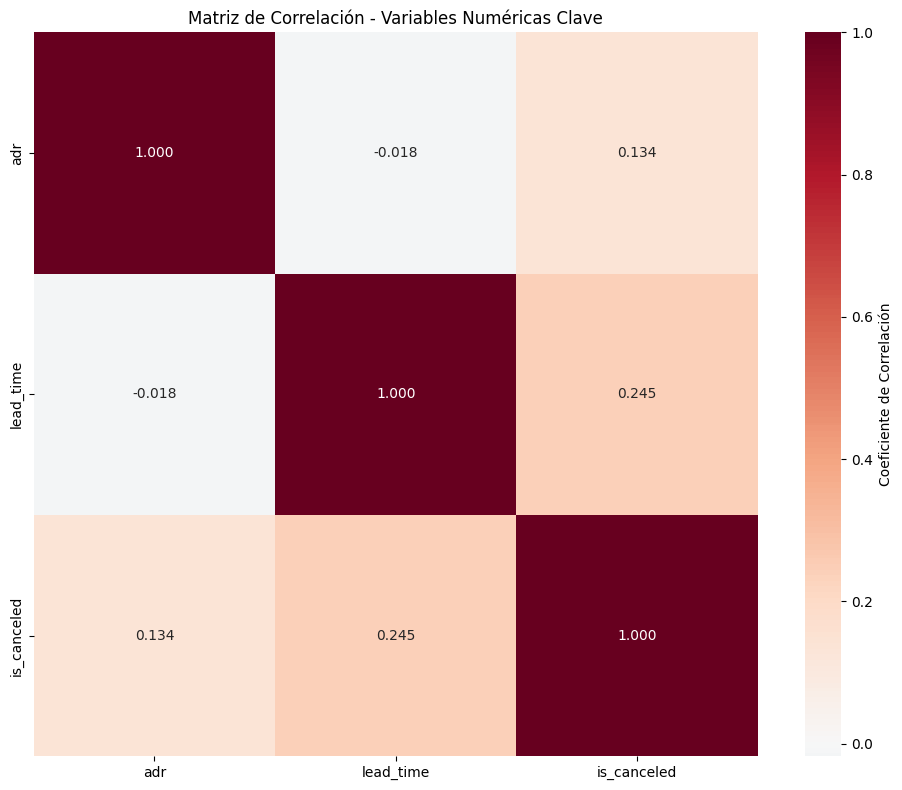

In [59]:
# Crear matriz de correlación para variables numéricas
numeric_vars = ['adr', 'lead_time', 'is_canceled']
correlation_matrix = hotel_df_clean[numeric_vars].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación - Variables Numéricas Clave')
plt.tight_layout()
plt.show()

#### **3.3 Análisis bivariado: Cancelaciones vs Variables clave**

**3.3.1 Relación entre ADR y Cancelaciones**

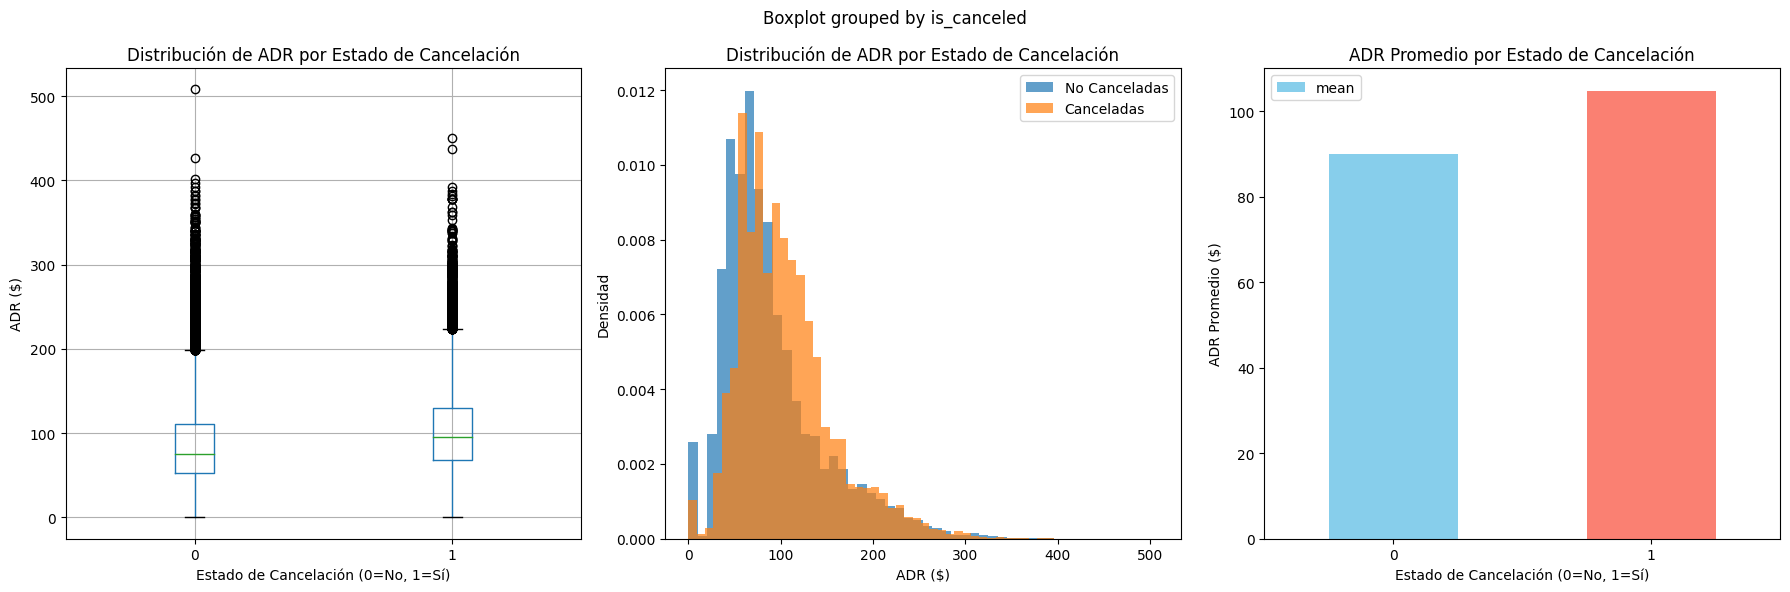

In [60]:
# Análisis de ADR por estado de cancelación
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Box plot comparativo
hotel_df_clean.boxplot(column='adr', by='is_canceled', ax=ax1)
ax1.set_title('Distribución de ADR por Estado de Cancelación')
ax1.set_xlabel('Estado de Cancelación (0=No, 1=Sí)')
ax1.set_ylabel('ADR ($)')

# Histogramas superpuestos
for canceled in [0, 1]:
    subset = hotel_df_clean[hotel_df_clean['is_canceled'] == canceled]['adr']
    label = 'No Canceladas' if canceled == 0 else 'Canceladas'
    ax2.hist(subset, bins=50, alpha=0.7, label=label, density=True)
ax2.set_title('Distribución de ADR por Estado de Cancelación')
ax2.set_xlabel('ADR ($)')
ax2.set_ylabel('Densidad')
ax2.legend()

# Estadísticas descriptivas
adr_stats_by_cancellation = hotel_df_clean.groupby('is_canceled')['adr'].agg(['mean', 'median', 'std', 'count'])
adr_stats_by_cancellation.plot(kind='bar', y='mean', ax=ax3, color=['skyblue', 'salmon'])
ax3.set_title('ADR Promedio por Estado de Cancelación')
ax3.set_xlabel('Estado de Cancelación (0=No, 1=Sí)')
ax3.set_ylabel('ADR Promedio ($)')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**3.3.2 Relación entre Lead Time y Cancelaciones**

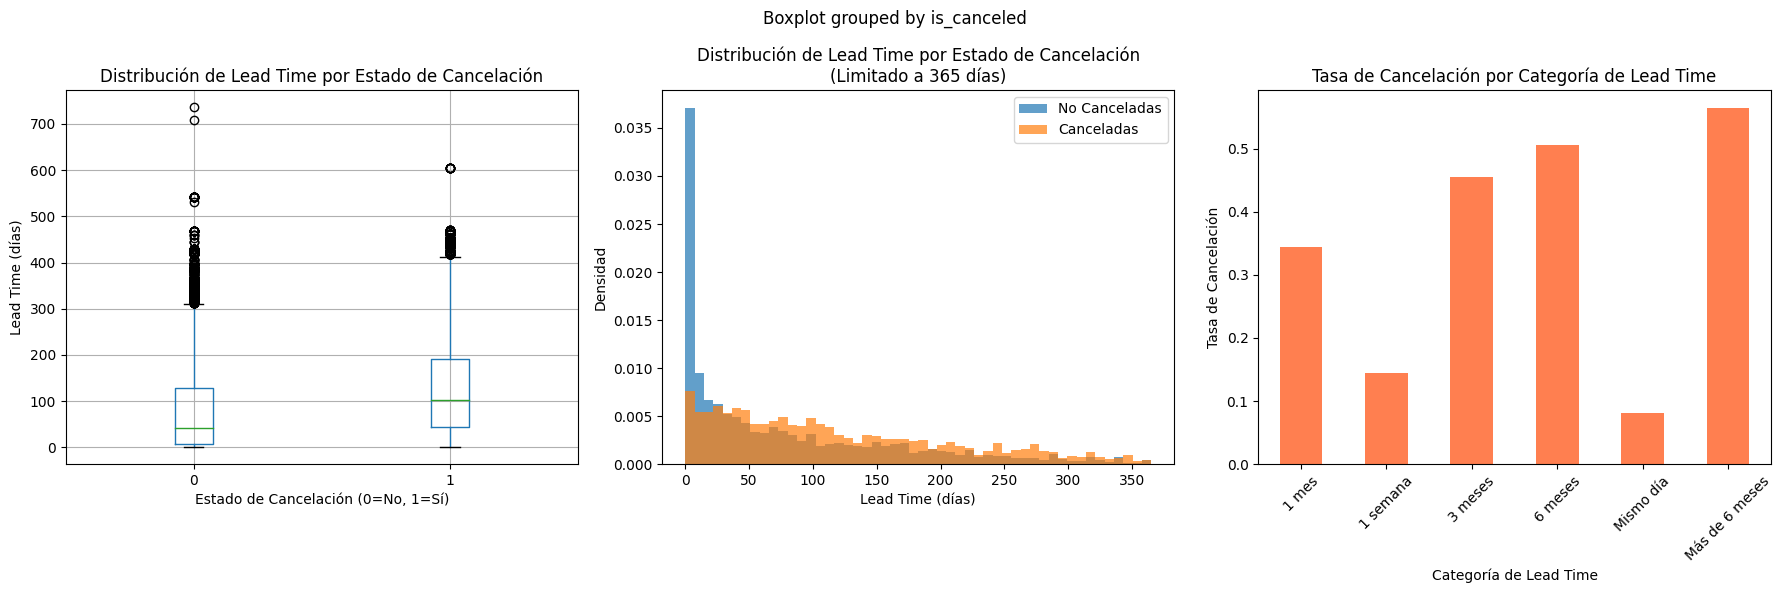

In [61]:
# Análisis de Lead Time por estado de cancelación
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Box plot comparativo
hotel_df_clean.boxplot(column='lead_time', by='is_canceled', ax=ax1)
ax1.set_title('Distribución de Lead Time por Estado de Cancelación')
ax1.set_xlabel('Estado de Cancelación (0=No, 1=Sí)')
ax1.set_ylabel('Lead Time (días)')

# Histogramas superpuestos (limitando a 365 días para mejor visualización)
lead_time_filtered = hotel_df_clean[hotel_df_clean['lead_time'] <= 365]
for canceled in [0, 1]:
    subset = lead_time_filtered[lead_time_filtered['is_canceled'] == canceled]['lead_time']
    label = 'No Canceladas' if canceled == 0 else 'Canceladas'
    ax2.hist(subset, bins=50, alpha=0.7, label=label, density=True)
ax2.set_title('Distribución de Lead Time por Estado de Cancelación\n(Limitado a 365 días)')
ax2.set_xlabel('Lead Time (días)')
ax2.set_ylabel('Densidad')
ax2.legend()

hotel_df_clean['lead_time_category'] = hotel_df_clean['lead_time'].apply(categorize_lead_time)

# Tasa de cancelación por categoría de lead time
cancellation_by_leadtime = hotel_df_clean.groupby('lead_time_category')['is_canceled'].agg(['mean', 'count'])
cancellation_by_leadtime['mean'].plot(kind='bar', ax=ax3, color='coral')
ax3.set_title('Tasa de Cancelación por Categoría de Lead Time')
ax3.set_xlabel('Categoría de Lead Time')
ax3.set_ylabel('Tasa de Cancelación')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**3.3.3 Relación entre Tipo de Hotel y Cancelaciones**

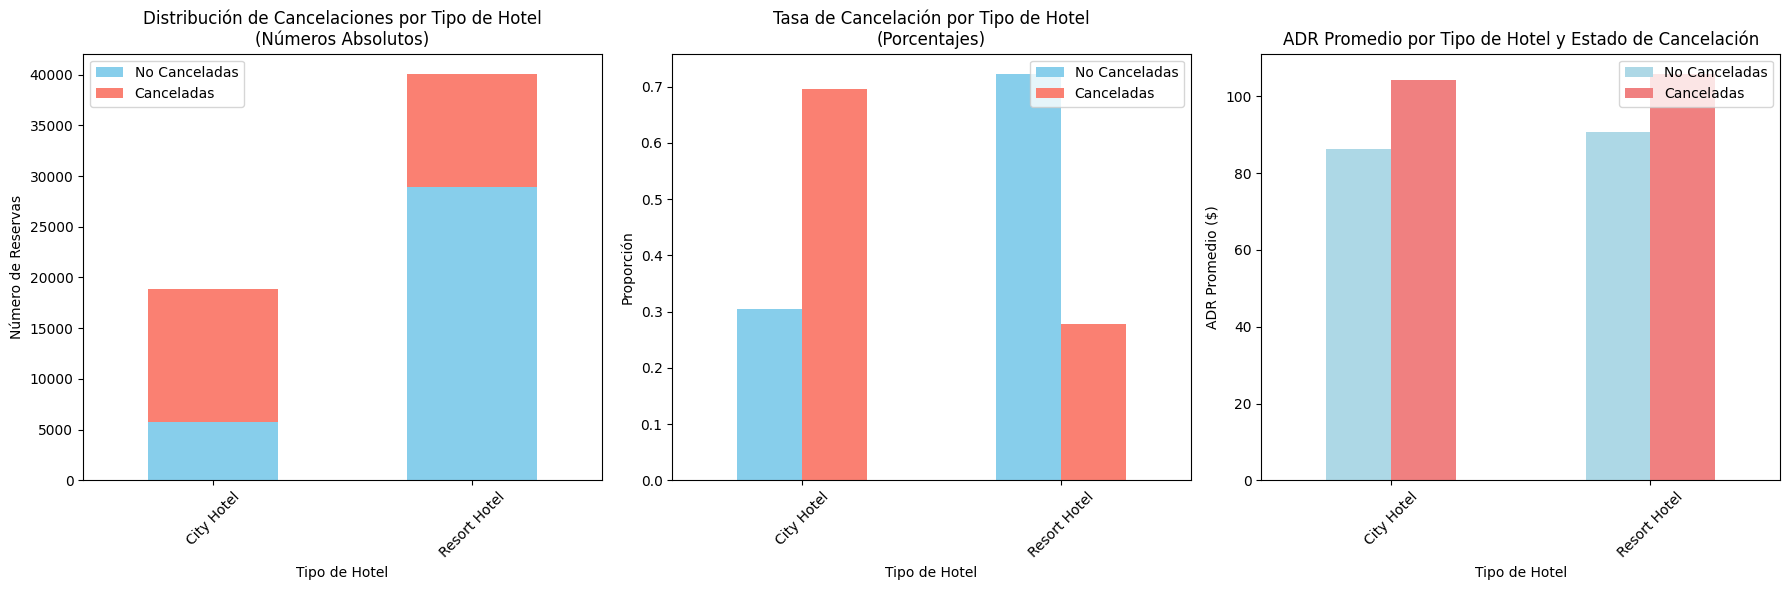

In [62]:
# Análisis de cancelaciones por tipo de hotel
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Tabla cruzada
hotel_cancellation_crosstab = pd.crosstab(hotel_df_clean['hotel'], hotel_df_clean['is_canceled'], normalize='index')

# Gráfico de barras apiladas (números absolutos)
pd.crosstab(hotel_df_clean['hotel'], hotel_df_clean['is_canceled']).plot(kind='bar', 
                                                                         stacked=True, 
                                                                         ax=ax1, 
                                                                         color=['skyblue', 'salmon'])
ax1.set_title('Distribución de Cancelaciones por Tipo de Hotel\n(Números Absolutos)')
ax1.set_xlabel('Tipo de Hotel')
ax1.set_ylabel('Número de Reservas')
ax1.legend(['No Canceladas', 'Canceladas'])
ax1.tick_params(axis='x', rotation=45)

# Gráfico de barras (porcentajes)
hotel_cancellation_crosstab.plot(kind='bar', ax=ax2, color=['skyblue', 'salmon'])
ax2.set_title('Tasa de Cancelación por Tipo de Hotel\n(Porcentajes)')
ax2.set_xlabel('Tipo de Hotel')
ax2.set_ylabel('Proporción')
ax2.legend(['No Canceladas', 'Canceladas'])
ax2.tick_params(axis='x', rotation=45)

# Comparación de ADR promedio por tipo de hotel y estado de cancelación
adr_by_hotel_cancellation = hotel_df_clean.groupby(['hotel', 'is_canceled'])['adr'].mean().unstack()
adr_by_hotel_cancellation.plot(kind='bar', ax=ax3, color=['lightblue', 'lightcoral'])
ax3.set_title('ADR Promedio por Tipo de Hotel y Estado de Cancelación')
ax3.set_xlabel('Tipo de Hotel')
ax3.set_ylabel('ADR Promedio ($)')
ax3.legend(['No Canceladas', 'Canceladas'])
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**3.3.4 Relación entre Tipo de Cliente y Cancelaciones**


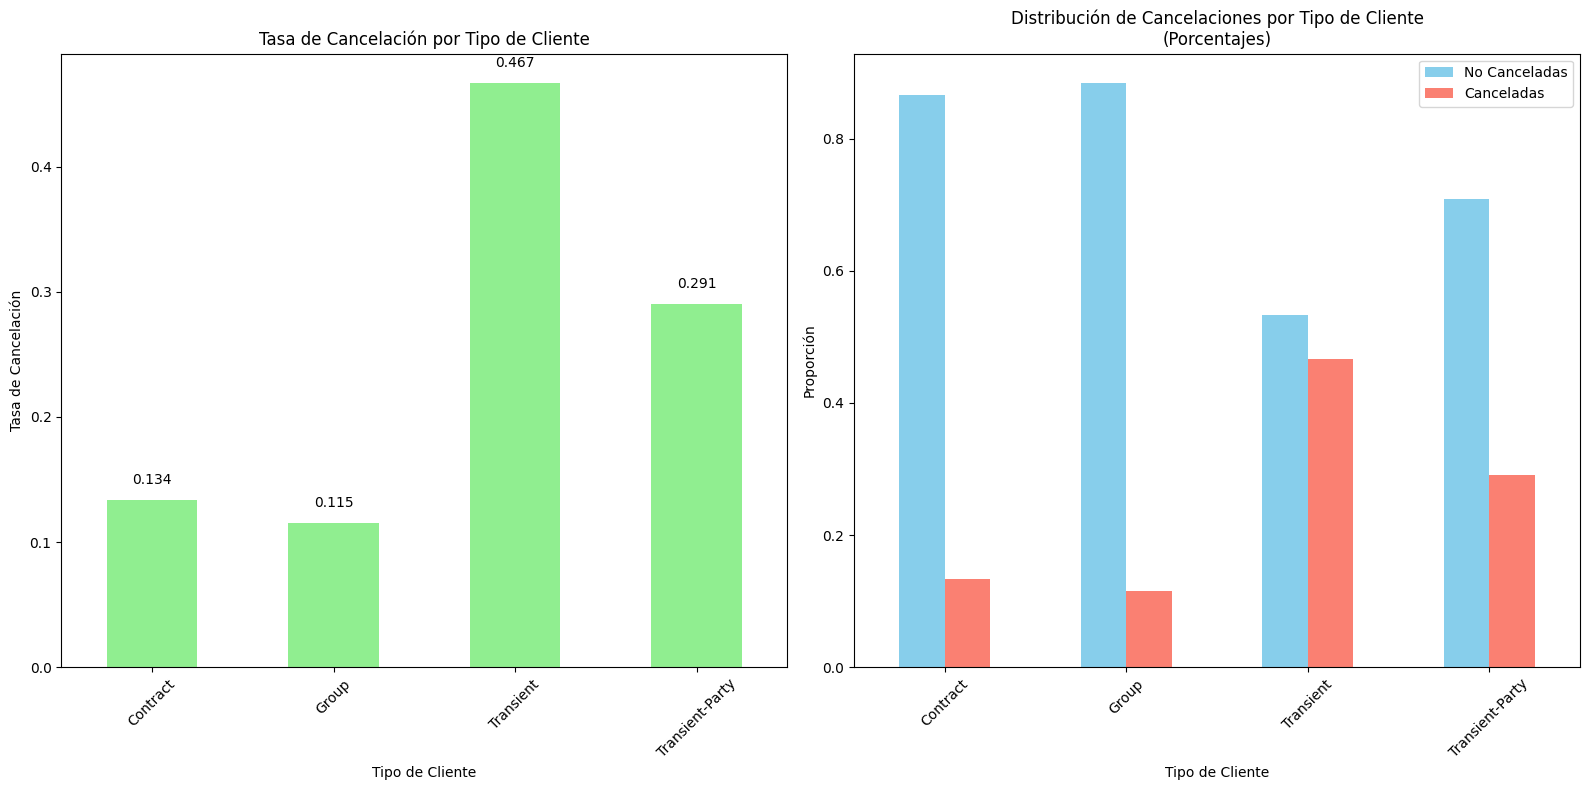

In [63]:
# Análisis de cancelaciones por tipo de cliente
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Tasa de cancelación por tipo de cliente
cancellation_by_customer = hotel_df_clean.groupby('customer_type')['is_canceled'].agg(['mean', 'count'])
cancellation_by_customer['mean'].plot(kind='bar', ax=ax1, color='lightgreen')
ax1.set_title('Tasa de Cancelación por Tipo de Cliente')
ax1.set_xlabel('Tipo de Cliente')
ax1.set_ylabel('Tasa de Cancelación')
ax1.tick_params(axis='x', rotation=45)

# Añadir valores sobre las barras
for i, v in enumerate(cancellation_by_customer['mean']):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Tabla cruzada con porcentajes
customer_cancellation_crosstab = pd.crosstab(hotel_df_clean['customer_type'], 
                                            hotel_df_clean['is_canceled'], 
                                            normalize='index')
customer_cancellation_crosstab.plot(kind='bar', ax=ax2, color=['skyblue', 'salmon'])
ax2.set_title('Distribución de Cancelaciones por Tipo de Cliente\n(Porcentajes)')
ax2.set_xlabel('Tipo de Cliente')
ax2.set_ylabel('Proporción')
ax2.legend(['No Canceladas', 'Canceladas'])
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()